In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
observations = pd.read_csv("data/observations_train.csv")
series = pd.read_csv("data/series.csv")

In [11]:
series.groupby("frequency").count()

,series_id,name,units,seasonal_adjustment,Description
frequency,,,,,
Daily,22,22,22,22,20
"Daily, 7-Day",4,4,4,4,4
"Daily, Close",1,1,1,1,1
Monthly,36,36,36,36,7
"Weekly, Ending Saturday",4,4,4,4,4
"Weekly, Ending Thursday",2,2,2,2,2
"Weekly, Ending Wednesday",2,2,2,2,2


In [18]:
series.query("""frequency == 'Weekly, Ending Thursday'""")

,series_id,name,frequency,units,seasonal_adjustment,Description
43,MORTGAGE15US,15-Year Fixed Rate Mortgage Average in the Uni...,"Weekly, Ending Thursday",Percent,Not Seasonally Adjusted,"Data is provided ""as is,"" with no warranties o..."
44,MORTGAGE30US,30-Year Fixed Rate Mortgage Average in the Uni...,"Weekly, Ending Thursday",Percent,Not Seasonally Adjusted,"Data is provided ""as is,"" by Freddie Mac® with..."


In [19]:
observations.head()

,series_id,date,value
0,AAA10Y,2000-01-03 00:00:00.0000000,1.17
1,AAA10Y,2000-01-04 00:00:00.0000000,1.20
2,AAA10Y,2000-01-05 00:00:00.0000000,1.16
3,AAA10Y,2000-01-06 00:00:00.0000000,1.15
4,AAA10Y,2000-01-07 00:00:00.0000000,1.17


In [24]:
observations['date'] = pd.to_datetime(observations['date']) #convert to date time
obs = observations.pivot(values = "value", index = "date", columns = "series_id") #pivot the table
obs

series_id,AAA10Y,ASEANTOT,BAA10Y,BUSAPPWNSAUS,BUSAPPWNSAUSYY,CBUSAPPWNSAUS,CBUSAPPWNSAUSYY,CUUR0000SA0R,DEXCHUS,DEXUSEU,...,PCUOMINOMIN,SFTPAGRM158SFRBSF,SP500,T10YIE,TEDRATE,TLAACBW027NBOG,TLBACBW027NBOG,TSIFRGHT,UNRATE,WLEMUINDXD
date,,,,,,,,,,,,,,,,,,,,,
2000-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.69
2000-01-03,1.17,NaN,1.69,NaN,NaN,NaN,NaN,NaN,8.2798,1.0155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.28
2000-01-04,1.20,NaN,1.72,NaN,NaN,NaN,NaN,NaN,8.2799,1.0309,...,NaN,NaN,NaN,NaN,0.77,NaN,NaN,NaN,NaN,253.20
2000-01-05,1.16,NaN,1.67,NaN,NaN,NaN,NaN,NaN,8.2798,1.0335,...,NaN,NaN,NaN,NaN,0.75,5628.536,5162.427,NaN,NaN,28.13
2000-01-06,1.15,NaN,1.67,NaN,NaN,NaN,NaN,NaN,8.2797,1.0324,...,NaN,NaN,NaN,NaN,0.78,NaN,NaN,NaN,NaN,25.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,1.05,NaN,1.76,NaN,NaN,NaN,NaN,NaN,6.5560,1.1902,...,NaN,NaN,2682.62,1.94,0.27,16758.645,14904.908,NaN,NaN,13.95
2017-12-28,1.05,NaN,1.76,NaN,NaN,NaN,NaN,NaN,6.5322,1.1952,...,NaN,NaN,2687.54,1.96,0.32,NaN,NaN,NaN,NaN,12.77
2017-12-29,1.05,NaN,1.77,NaN,NaN,NaN,NaN,NaN,6.5063,1.2022,...,NaN,NaN,2673.61,1.96,0.32,NaN,NaN,NaN,NaN,23.07


In [29]:
sp500 = obs['SP500']
sp500.dropna(inplace = True)
sp500

date
2011-02-14    1332.32
2011-02-15    1328.01
2011-02-16    1336.32
2011-02-17    1340.43
2011-02-18    1343.01
               ...   
2017-12-22    2683.34
2017-12-26    2680.50
2017-12-27    2682.62
2017-12-28    2687.54
2017-12-29    2673.61
Name: SP500, Length: 1732, dtype: float64

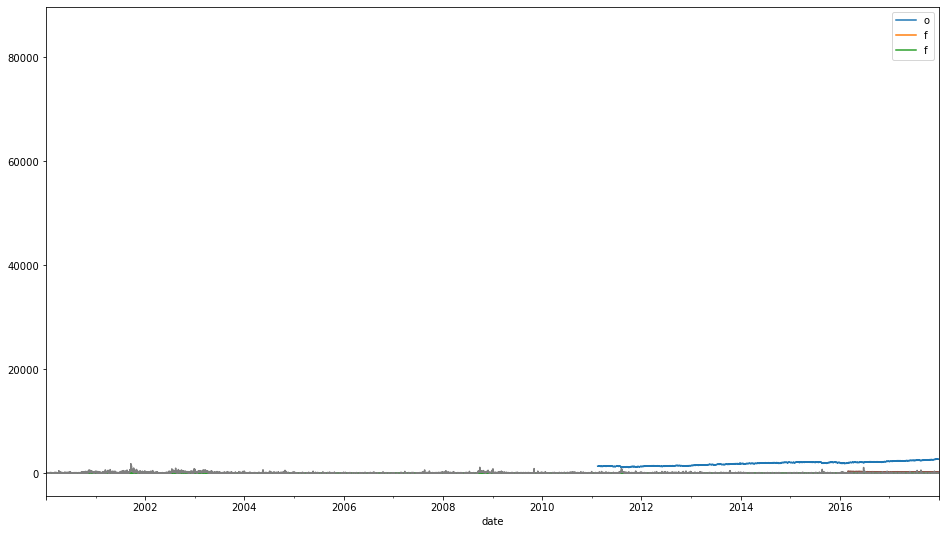

In [30]:
fig, ax = plt.subplots(figsize=(16, 9))
obs.plot(ax=ax)
ax.legend("off")

In [32]:
obs.max()

series_id
AAA10Y                3.000
ASEANTOT            106.200
BAA10Y                6.160
BUSAPPWNSAUS      85450.000
BUSAPPWNSAUSYY      687.950
                    ...    
TLAACBW027NBOG    16841.372
TLBACBW027NBOG    14989.244
TSIFRGHT            133.600
UNRATE               10.000
WLEMUINDXD         1811.330
Length: 68, dtype: float64

In [38]:
obs["BUSAPPWNSAUS"].sort_values(ascending = False) #check if this max is an outlier

date
2012-12-29    85450.0
2017-01-28    75570.0
2016-01-09    74970.0
2017-02-04    74360.0
2007-01-20    74190.0
               ...   
2017-12-26        NaN
2017-12-27        NaN
2017-12-28        NaN
2017-12-29        NaN
2017-12-31        NaN
Name: BUSAPPWNSAUS, Length: 6574, dtype: float64

In [50]:
obs.max() > 10000

series_id
AAA10Y            False
ASEANTOT          False
BAA10Y            False
BUSAPPWNSAUS       True
BUSAPPWNSAUSYY    False
                  ...  
TLAACBW027NBOG     True
TLBACBW027NBOG     True
TSIFRGHT          False
UNRATE            False
WLEMUINDXD        False
Length: 68, dtype: bool

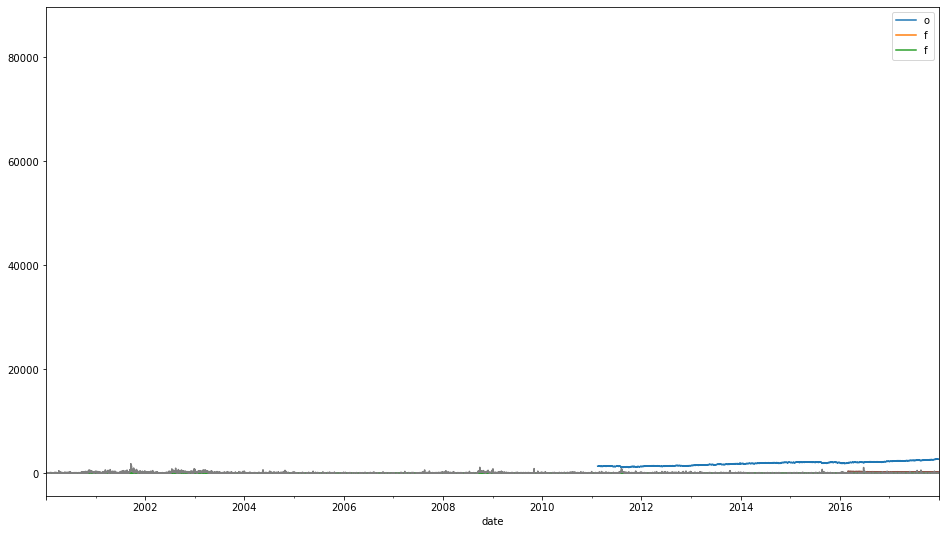

In [52]:
fig, ax = plt.subplots(figsize=(16, 9))
obs.plot(ax=ax)
ax.legend("off")

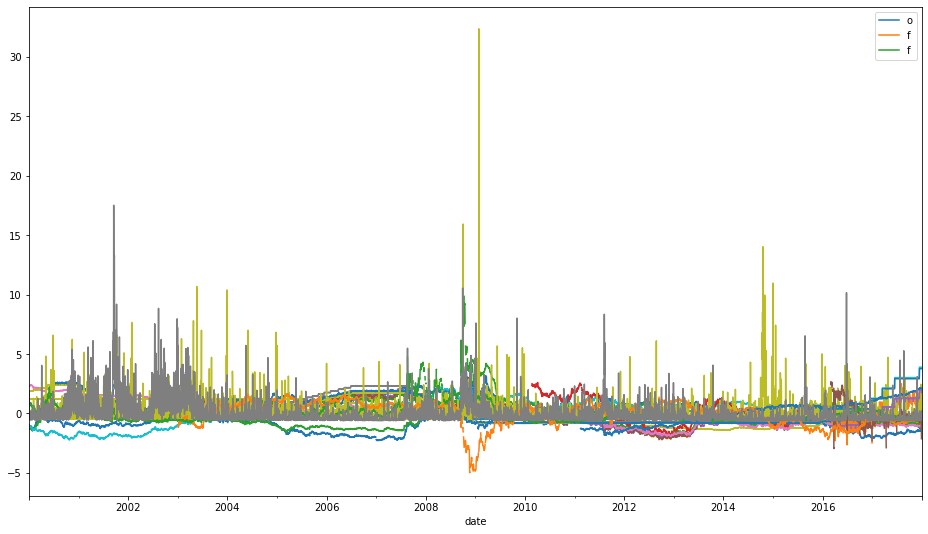

In [55]:
normalize = lambda col:(col-col.mean())/col.std()

normed_obs = obs.apply(normalize, axis = 0)

fig, ax = plt.subplots(figsize=(16, 9))
normed_obs.plot(ax=ax)
ax.legend("off")

In [60]:
normed_obs.corr()['SP500']

series_id
AAA10Y           -0.702341
ASEANTOT         -0.845046
BAA10Y           -0.640168
BUSAPPWNSAUS           NaN
BUSAPPWNSAUSYY         NaN
                    ...   
TLAACBW027NBOG    0.972114
TLBACBW027NBOG    0.971807
TSIFRGHT          0.968472
UNRATE           -0.964499
WLEMUINDXD       -0.204052
Name: SP500, Length: 68, dtype: float64

In [61]:
series.query("""series_id == 'UNRATE'""")

,series_id,name,frequency,units,seasonal_adjustment,Description
69,UNRATE,Unemployment Rate,Monthly,Percent,Seasonally Adjusted,The unemployment rate represents the number of...


In [64]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [72]:
m = Prophet()

features = pd.DataFrame({'ds': normed_obs.index, 'y': normed_obs['SP500'], 'unem': normed_obs['UNRATE']})
#ds is date time, y is the value we wanna input, third parameter is what we want to use to compare
features = features.loc[features.index >= '2011-02-14']
features['unem'].fillna(method = 'ffill').dropna()
#first non-null is 2011-03-01

date
2011-03-01    1.637112
2011-03-02    1.637112
2011-03-03    1.637112
2011-03-04    1.637112
2011-03-05    1.637112
                ...   
2017-12-27   -1.151405
2017-12-28   -1.151405
2017-12-29   -1.151405
2017-12-30   -1.151405
2017-12-31   -1.151405
Name: unem, Length: 2498, dtype: float64

In [74]:
obs['SP500']

date
2000-01-02        NaN
2000-01-03        NaN
2000-01-04        NaN
2000-01-05        NaN
2000-01-06        NaN
               ...   
2017-12-27    2682.62
2017-12-28    2687.54
2017-12-29    2673.61
2017-12-30        NaN
2017-12-31        NaN
Name: SP500, Length: 6574, dtype: float64

In [89]:
test_obs = pd.read_csv("data/observations_test.csv")
test_unem = normalize(test_obs.query("""series_id == 'UNRATE'""").set_index("date"))['value']
test_unem

date
2018-02-01 00:00:00.0000000   -0.036799
2018-03-01 00:00:00.0000000   -0.084113
2018-04-01 00:00:00.0000000   -0.084113
2018-05-01 00:00:00.0000000   -0.178739
2018-06-01 00:00:00.0000000   -0.084113
2018-07-01 00:00:00.0000000   -0.178739
2018-08-01 00:00:00.0000000   -0.178739
2018-09-01 00:00:00.0000000   -0.226052
2018-10-01 00:00:00.0000000   -0.178739
2018-11-01 00:00:00.0000000   -0.226052
2018-12-01 00:00:00.0000000   -0.131426
2019-01-01 00:00:00.0000000   -0.084113
2019-02-01 00:00:00.0000000   -0.178739
2019-03-01 00:00:00.0000000   -0.178739
2019-04-01 00:00:00.0000000   -0.273366
2019-05-01 00:00:00.0000000   -0.273366
2019-06-01 00:00:00.0000000   -0.226052
2019-07-01 00:00:00.0000000   -0.226052
2019-08-01 00:00:00.0000000   -0.226052
2019-09-01 00:00:00.0000000   -0.320679
2019-10-01 00:00:00.0000000   -0.273366
2019-11-01 00:00:00.0000000   -0.320679
2019-12-01 00:00:00.0000000   -0.320679
2020-01-01 00:00:00.0000000   -0.273366
2020-02-01 00:00:00.0000000   -0.32

In [90]:
test_obs.query("""series_id == 'UNRATE'""")

,series_id,date,value
23120,UNRATE,2018-02-01 00:00:00.0000000,4.1
23121,UNRATE,2018-03-01 00:00:00.0000000,4.0
23122,UNRATE,2018-04-01 00:00:00.0000000,4.0
23123,UNRATE,2018-05-01 00:00:00.0000000,3.8
23124,UNRATE,2018-06-01 00:00:00.0000000,4.0
23125,UNRATE,2018-07-01 00:00:00.0000000,3.8
23126,UNRATE,2018-08-01 00:00:00.0000000,3.8
23127,UNRATE,2018-09-01 00:00:00.0000000,3.7
23128,UNRATE,2018-10-01 00:00:00.0000000,3.8
23129,UNRATE,2018-11-01 00:00:00.0000000,3.7
